In [ ]:
# Corridor width and position


Load libraries etc.:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import itertools
import operator
import numpy as np
import math
%matplotlib inline 
plt.ion()

import sys
sys.path.append('../simulations/')
from grid_manager import Grid
from habitat_analysis import HabitatAnalysis



## Landscape simulation function:

In [2]:
def perm_wall_sim(grid_shape = [30,60], Q=1, A=0.9, ww=3, wp=0.5, cw=[3,3], cp=[0.35,0.7]):
   "simulate a permeable wall"
   # 1. initialize landscape
   n_rows,n_cols = grid_shape
   N = n_rows*n_cols
   qualities = np.ones((N,))*Q
   g = Grid(shape=grid_shape, qualities=qualities)
   g.A = A * g.A

   # 2. compute the wall
   wpt = int(math.floor(n_cols*wp)-math.ceil(ww/2))
   xs = range(wpt, wpt+ww)
    
   # 3. compute the corridors
   for i in range(len(cw)):
       cpt=int(math.floor(n_rows*cp[i])-math.ceil(cw[i]/2))
       if i == 0:
           ys = range(cpt)
       else:
           ys=ys+range(max(ys)+1+cw[i-1], cpt)
   ys=ys+range(max(ys)+1+cw[i], n_rows)
    
   impossible_nodes = list(itertools.product(ys,xs))
   g.set_impossible_nodes(impossible_nodes)
   return [g]

## Make the figure:

In [3]:
#create the landscapes
N = 30*60
wp=0.25

lg25 = []
lg25.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[29], cp=[0.5])[0])
lg25.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[0], cp=[0.5])[0])
lg25.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[1,0], cp=[0.35,0.7])[0])
lg25.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[4,0], cp=[0.35,0.7])[0])
lg25.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[4,1], cp=[0.35,0.7])[0])
lg25.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[4,4], cp=[0.35,0.7])[0])

wp=0.5
lg50 = []
lg50.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[29], cp=[0.5])[0])
lg50.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[0], cp=[0.5])[0])
lg50.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[1,0], cp=[0.35,0.7])[0])
lg50.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[4,0], cp=[0.35,0.7])[0])
lg50.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[4,1], cp=[0.35,0.7])[0])
lg50.append(perm_wall_sim(grid_shape = [30,60], wp=wp, cw=[4,4], cp=[0.35,0.7])[0])

len(lg50)

6

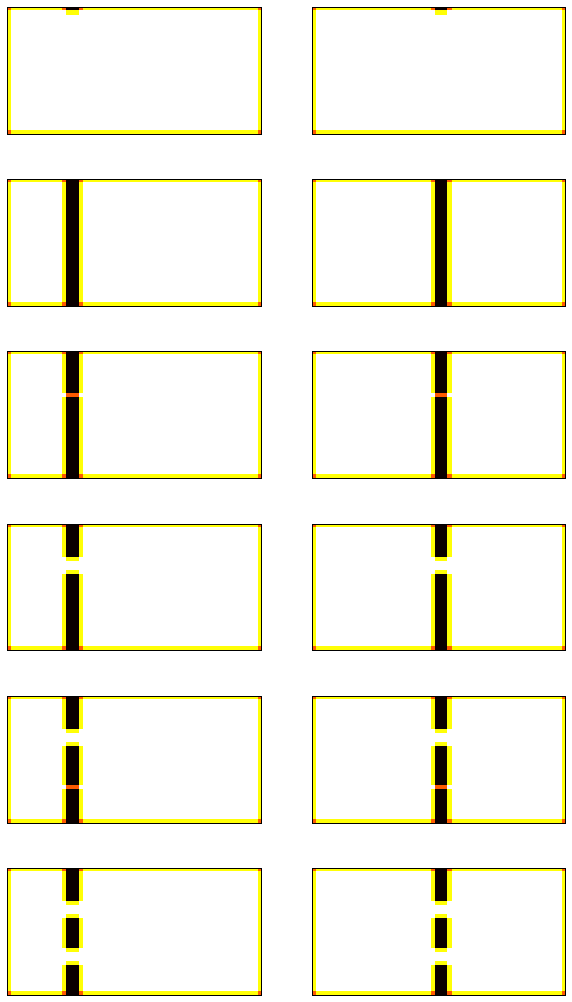

In [4]:
fig, ax = plt.subplots(6,2, figsize=(2*5,6*3))

for j in range(6):
    values = lg25[j].A.transpose().dot(np.ones((lg25[j].N, )))
    z = np.reshape(values, lg25[j].shape)
    ax[j,0].set_xticks([])
    ax[j,0].set_yticks([])
    ax[j,0].imshow(z, cmap='hot', interpolation='nearest')
    
    values = lg50[j].A.transpose().dot(np.ones((lg50[j].N, )))
    z = np.reshape(values, lg50[j].shape)
    ax[j,1].set_xticks([])
    ax[j,1].set_yticks([])
    ax[j,1].imshow(z, cmap='hot', interpolation='nearest')
    

In [5]:
#set the different parameters
beta1 = 3
beta2 = 0.01
a_to_c = 'minus_log'
d_to_k = 'inverse_of_plus_1'

NameError: name 'g' is not defined

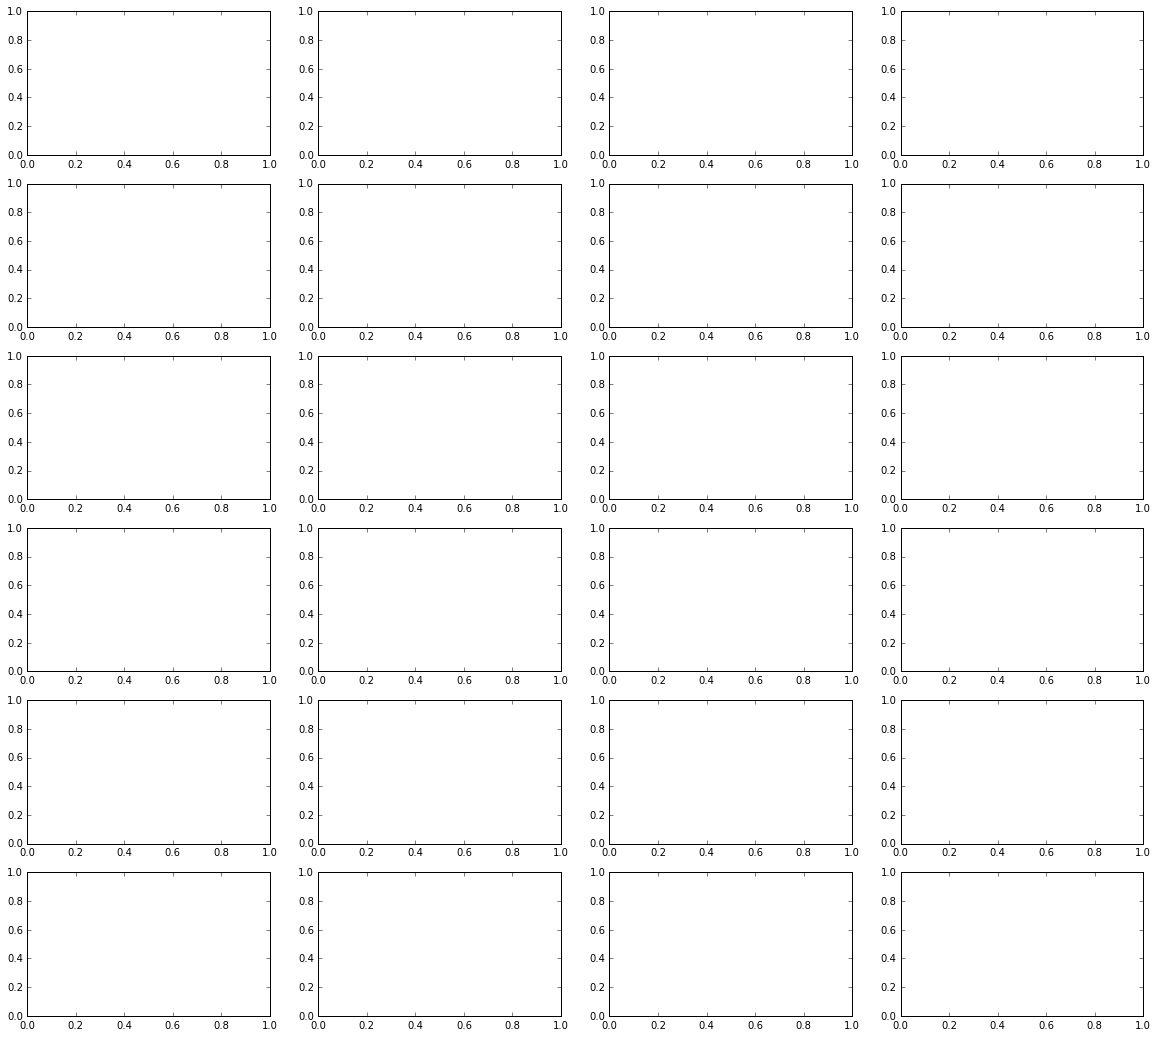

In [6]:
fig, ax = plt.subplots(6,4, figsize=(4*5,6*3))
g = lg25[j]
for j in range(6):
    #panel 1
    landscape_FE = \
    HabitatAnalysis(lg25[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='free_energy', beta=beta1, \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_FE.compute_similarities()

    HFs_FE = landscape_FE.compute_habitat_functionalities()
    LF_FE = np.sum(HFs_FE)
    if j==0:
       refv1 = LF_FE
    z = np.reshape(HFs_FE, g.shape)
    ax[j,0].set_title('LF = ' + str(int(round(100*(LF_FE-refv1)/refv1))))
    ax[j,0].set_xticks([])
    ax[j,0].set_yticks([])
    ax[j,0].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'

    #panel 2
    landscape_FE = \
    HabitatAnalysis(lg50[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='free_energy', beta=beta1, \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_FE.compute_similarities()

    HFs_FE = landscape_FE.compute_habitat_functionalities()
    LF_FE = np.sum(HFs_FE)
    if j==0:
       refv2 = LF_FE
    z = np.reshape(HFs_FE, g.shape)
    ax[j,1].set_title('LF = ' + str(int(round(100*(LF_FE-refv2)/refv2))))
    ax[j,1].set_xticks([])
    ax[j,1].set_yticks([])
    ax[j,1].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'

    #panel 3
    landscape_FE = \
    HabitatAnalysis(lg25[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='free_energy', beta=beta2, \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_FE.compute_similarities()

    HFs_FE = landscape_FE.compute_habitat_functionalities()
    LF_FE = np.sum(HFs_FE)
    if j==0:
       refv3 = LF_FE
    z = np.reshape(HFs_FE, g.shape)
    ax[j,2].set_title('LF = ' + str(int(round(100*(LF_FE-refv3)/refv3))))
    ax[j,2].set_xticks([])
    ax[j,2].set_yticks([])
    ax[j,2].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'

    #panel 4
    landscape_FE = \
    HabitatAnalysis(lg50[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='free_energy', beta=beta2, \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_FE.compute_similarities()

    HFs_FE = landscape_FE.compute_habitat_functionalities()
    LF_FE = np.sum(HFs_FE)
    if j==0:
       refv4 = LF_FE
    z = np.reshape(HFs_FE, g.shape)
    ax[j,3].set_title('LF = ' + str(int(round(100*(LF_FE-refv4)/refv4))))
    ax[j,3].set_xticks([])
    ax[j,3].set_yticks([])
    ax[j,3].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'


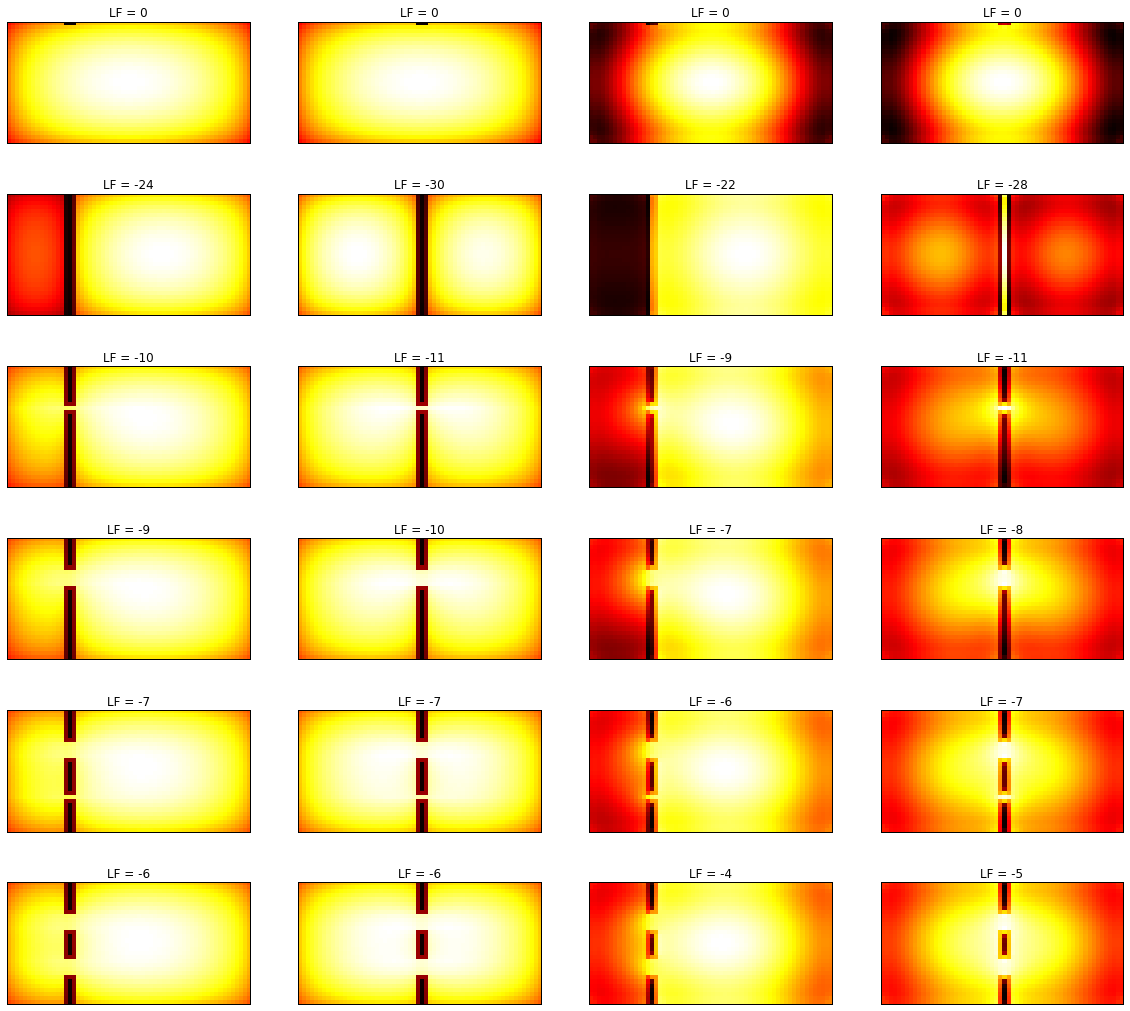

In [78]:
fig, ax = plt.subplots(6,4, figsize=(4*5,6*3))

for j in range(6):
    #panel 1
    landscape_LC = \
    HabitatAnalysis(lg25[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='least_cost', \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_LC.compute_similarities()

    HFs_LC = landscape_LC.compute_habitat_functionalities()
    LF_LC = np.sum(HFs_LC)
    if j==0:
       refv1 = LF_LC
    z = np.reshape(HFs_LC, g.shape)
    ax[j,0].set_title('LF = ' + str(int(round(100*(LF_LC-refv1)/refv1))))
    ax[j,0].set_xticks([])
    ax[j,0].set_yticks([])
    ax[j,0].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'

    #panel 2
    landscape_LC = \
    HabitatAnalysis(lg50[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='least_cost', \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_LC.compute_similarities()

    HFs_LC = landscape_LC.compute_habitat_functionalities()
    LF_LC = np.sum(HFs_LC)
    if j==0:
       refv2 = LF_LC
    z = np.reshape(HFs_LC, g.shape)
    ax[j,1].set_title('LF = ' + str(int(round(100*(LF_LC-refv2)/refv2))))
    ax[j,1].set_xticks([])
    ax[j,1].set_yticks([])
    ax[j,1].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'

    #panel 3
    landscape_FE = \
    HabitatAnalysis(lg25[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='free_energy', beta=beta2, \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_FE.compute_similarities()

    HFs_FE = landscape_FE.compute_habitat_functionalities()
    LF_FE = np.sum(HFs_FE)
    if j==0:
       refv3 = LF_FE
    z = np.reshape(HFs_FE, g.shape)
    ax[j,2].set_title('LF = ' + str(int(round(100*(LF_FE-refv3)/refv3))))
    ax[j,2].set_xticks([])
    ax[j,2].set_yticks([])
    ax[j,2].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'

    #panel 4
    landscape_FE = \
    HabitatAnalysis(lg50[j], sampling_method='qualities', n_landmarks=N,\
                    similarity_measure='free_energy', beta=beta2, \
                    affinity_to_cost=a_to_c, distance_to_similarity=d_to_k)
    landscape_FE.compute_similarities()

    HFs_FE = landscape_FE.compute_habitat_functionalities()
    LF_FE = np.sum(HFs_FE)
    if j==0:
       refv4 = LF_FE
    z = np.reshape(HFs_FE, g.shape)
    ax[j,3].set_title('LF = ' + str(int(round(100*(LF_FE-refv4)/refv4))))
    ax[j,3].set_xticks([])
    ax[j,3].set_yticks([])
    ax[j,3].imshow(z, cmap=plt.get_cmap('hot'), interpolation='nearest') # for BW use 'gray'
